# Chapter 3: Exercise 14

## Exploring Collinearity

**Import packages**

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS, summarize)

### (a) Perform some commands

In [2]:
rng = np.random.default_rng (10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

Form of linear model: $$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon$$
$$y = 2 + 2 X_1 + 0.3 X_2 + \epsilon$$

Regression Coefficients: 
- $\beta_0 = 2$
- $\beta_1 = 2$
- $\beta_2 = 0.3$

### (b) Correlation and scatterplot between $x1$ and $x2$

In [3]:
df = pd.DataFrame({'x1': x1, 'x2': x2})

In [4]:
np.corrcoef(x1, x2);

In [5]:
df.corr()

,x1,x2
x1,1.000000,0.772324
x2,0.772324,1.000000


The correlation between $x1$ and $x2$ is $0.7723245$

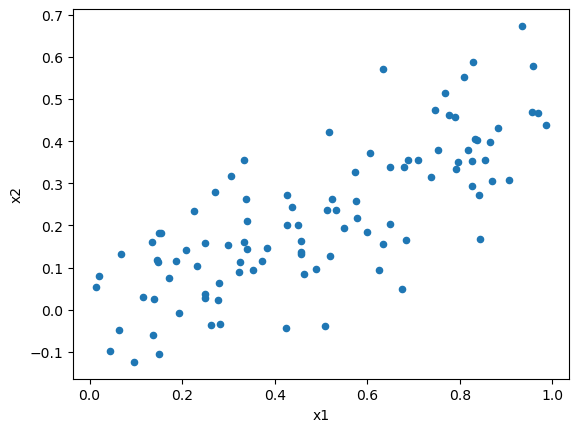

In [6]:
df.plot.scatter('x1', 'x2');

### (c) Fit a least squares regression to predict y given x1, x2

In [7]:
X = MS(['x1', 'x2']).fit_transform(df)

In [8]:
model = sm.OLS(y, X)
result = model.fit()
result.ssr

79.80938177496542

In [9]:
result.summary();
summarize(result)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


- $\hat{\beta_0} = 1.9579$, $\beta_0 = 2$
- $\hat{\beta_1} = 1.6154$, $\beta_1 = 2$
- $\hat{\beta_2} = 0.9428$, $\beta_2 = 0.3$

The coefficient estimates are okay.

We can reject $H_0: \beta_1 = 0$ since $p=0.003$ is small. We **cannot** reject $H_0: \beta_2 = 0$ since $p=0.259$ is not small.

### (d) Least squares regression to predict y using only x1

In [10]:
X = MS(['x1']).fit_transform(df)
model2 = sm.OLS(y, X)
result2 = model2.fit()
summarize(result2)

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


In [11]:
result2.ssr

80.86820066735713

Sum of squared residuals (SSR) is only slightly worse than previous model using x1 and x2 as predictors. With p value small we can reject $H_0: \beta_1 = 0$ concluding x1 is significant as a predictor.

### (e) Least squares regression to predict y using only x2

In [12]:
X = MS(['x2']).fit_transform(df)
model3 = sm.OLS(y, X)
result3 = model3.fit()
summarize(result3)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


In [13]:
result3.ssr

87.54071521302768

Sum of squared residuals (SSR) is worse than previous two models. With p value small we can reject $H_0: \beta_1 = 0$ concluding x2 is significant as a predictor.

### (f) Commentary on above results

When using x1 and x2 as predictors of y we saw x1 was statistically significant while x2 was not. However, fitting models with x1 or x2 alone we see each predictor is significant. These are not contradictory results. What we see is in the precense of x1, x2 is not significant in predicting y. This is because of collinearity that exists in our data. x1 and x2 have a strong linear relationship with Pearson product-moment correlation of 0.772324

In [14]:
anova_lm(result2, result)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,98.0,80.868201,0.0,NaN,NaN,NaN
1,97.0,79.809382,1.0,1.058819,1.286884,0.259419


We see in the anova table adding x2 to our model does not result in a better fit. Again, this is due to the collinearity that exists between x1 and x2.

### (g) Adding an extra point to the data and re-running models

In [15]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

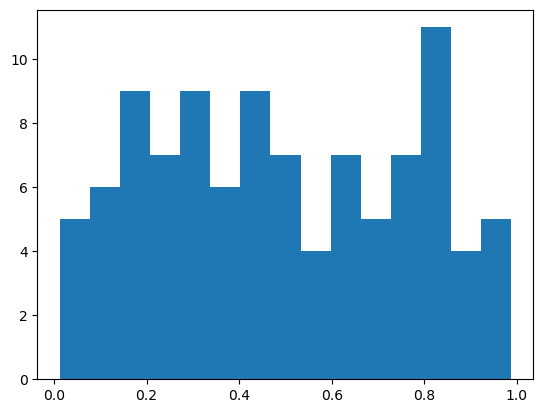

In [16]:
plt.hist(x1, bins=15);

The added x1 value of 0.1 fits in with the rest of the data in the x1 array.

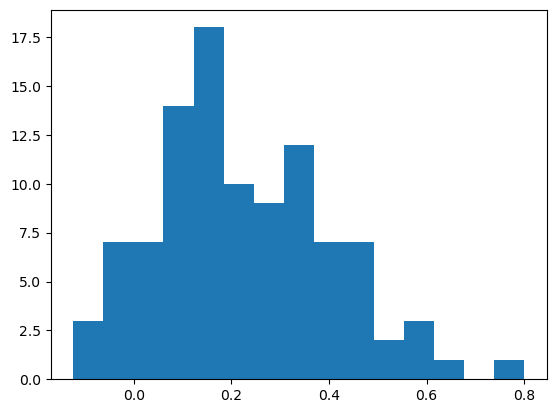

In [17]:
plt.hist(x2, bins=15);

The added x2 value of 0.8 does not fit in with the rest of the data in the x2 array.

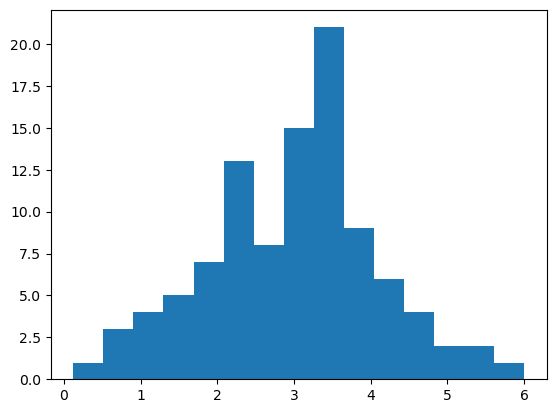

In [18]:
plt.hist(y, bins=15);

The added y value of 6 does not fit in with the rest of the data in the y array.

Form of linear model:
$$y = 2 + 2 X_1 + 0.3 X_2 + \epsilon$$

In [19]:
2 + 2 * 0.1 + 0.3 * 0.8

2.4400000000000004

The added y value of 6 also does not fit with the regression equation used to generate the y array.

In [20]:
df = pd.DataFrame({'x1': x1, 'x2': x2})

#### Least squares regression to predict y given x1, x2

In [21]:
X = MS(['x1', 'x2']).fit_transform(df)

In [22]:
modelNew = sm.OLS(y, X)
resultNew = modelNew.fit()

In [23]:
resultNew.summary();
summarize(resultNew)

,coef,std err,t,P>|t|
intercept,2.0618,0.192,10.720,0.000
x1,0.8575,0.466,1.838,0.069
x2,2.2663,0.705,3.216,0.002


In [24]:
summarize(result)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


In the new model with the added point our coefficient estimates are further off from the population coefficients. In the new model we see x2 is statistically significant while x1 is not. This is the reverse of what we had before adding the point.

In [26]:
infl = resultNew.get_influence()
stu_res = infl.get_resid_studentized_external()
leverage = infl.hat_matrix_diag

In [56]:
stu_res[np.abs(stu_res) > 2.6]

array([2.69255745])

In [58]:
np.nonzero(np.abs(stu_res) > 2.6)

(array([100], dtype=int64),)

There are no values with studentized residuals greater than 3 in absolute value. Thus no evidence of outliers. However our added observation does come close.

In [48]:
leverage[leverage > np.average(leverage)*4]

array([0.34767162])

In [49]:
np.nonzero(leverage > np.average(leverage)*4)

(array([100], dtype=int64),)

Our added observation is a high leverage point. It has greater than four times the average leverage.

#### Least squares regression to predict y given x1

In [59]:
X = MS(['x1']).fit_transform(df)

In [60]:
model2New = sm.OLS(y, X)
result2New = model2New.fit()

In [61]:
result2New.summary();
summarize(result2New)

,coef,std err,t,P>|t|
intercept,2.0739,0.201,10.310,0.0
x1,1.8760,0.358,5.236,0.0


In [62]:
summarize(result2)

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


We see similar results in our new model with the addition of the extra observation. This may be due to our note above about the added x1 value fitting in well with the rest of the x1 array.

In [63]:
infl = result2New.get_influence()
stu_res = infl.get_resid_studentized_external()
leverage = infl.hat_matrix_diag

In [65]:
stu_res[np.abs(stu_res) > 3]

array([3.86976729])

In [66]:
np.nonzero(np.abs(stu_res) > 3)

(array([100], dtype=int64),)

Our new observation has studentized residual greater than 3 in absolute value. This is enough to deem it an outlier.

In [71]:
leverage[leverage > np.average(leverage)*4]

array([], dtype=float64)

In [72]:
np.nonzero(leverage > np.average(leverage)*4)

(array([], dtype=int64),)

Our added observation is not a high leverage point. Again this may be due to the new x1 value fitting in well with the rest of the x1 array.

#### Least squares regression to predict y given x2

In [73]:
X = MS(['x2']).fit_transform(df)

In [74]:
model3New = sm.OLS(y, X)
result3New = model3New.fit()

In [75]:
result3New.summary();
summarize(result3New)

,coef,std err,t,P>|t|
intercept,2.2840,0.151,15.088,0.0
x2,3.1458,0.524,6.008,0.0


In [76]:
summarize(result3)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


We see similar results in our new model with the addition of the extra observation. 

In [83]:
infl = result3New.get_influence()
stu_res = infl.get_resid_studentized_external()
leverage = infl.hat_matrix_diag

In [84]:
stu_res[np.abs(stu_res) > 3]

array([], dtype=float64)

In [85]:
np.nonzero(np.abs(stu_res) > 3)

(array([], dtype=int64),)

Our new observation does not have studentized residual greater than 3 in absolute value. Thus it is not an outlier in this model.

In [86]:
leverage[leverage > np.average(leverage)*4]

array([0.11020664])

In [87]:
np.nonzero(leverage > np.average(leverage)*4)

(array([100], dtype=int64),)

Our added observation has leverage greater than four times the average leverage. Thus it is a high leverage point.